# 4. 신경망 학습

- **학습(Training)** 이란 훈련 데이터로 부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- **손실함수(Lost Function)** 는 신경망이 학습할 수 있도록 해주는 지표이며, 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

---
## 4.1 데이터에서 학습한다!
- **기계학습은 데이터가 생명** : 데이터에서 답을 찾고, 데이터에서 패턴을 발견하고, 데이터로 이야기를 만드는 것이 기계학습. <br>
   기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로 부터 패턴을 찾으려 시도함
- 손글씨 이미지 인식 프로그램의 경우, 이미지에서 **특징/특성(Feature)** 을 추출하고 그 특징의 패턴을 기계학습 기술로 학습함. <br>
   "**특성**"이란 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 의미. 이미지의 특징은 벡터로 기술
- 기계학습에서도 이미지를 벡터로 변환할 때 사용하는 특성은 사람이 설계함. 반변, 신경망(딥러닝)에서는 특성까지도 기계가 스스로 학습함. <br>
   딥러닝을 "종단간 기계학습(end-to-end machine learning) 이라고도 함
- 데이터를 **훈련 데이터** 와 **시험 데이터** 로 나눠서, 훈련 데이터만으로 학습하여 최적의 매개변수를 찾고, 시험 데이터를 사용하여 훈련한 모델의 성능을 평가함. <br>
   이는 **범용 능력(일반화 성능)** 을 제대로 평가하기 위함. 범용 능력은 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력.
- 한 데이터 셋에만 지나치게 최적화된 상태(범용 능력이 떨어지는 상태)를 **오버피팅(overfitting, 과적합)** 이라 함

## 4.2 손실 함수

- 신경망 학습에서는 현재의 상태를 "하나의 지표"로 표현하고, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색함. <br>
   신경망 학습에서 사용하는 지표를 **손실 함수(Lost Function)** 또는 **비용 함수(Cost Function)** 이라 함
- **평균 제곱 오차(mean squared error, MSE)**
> $E = \frac{1}{2} \sum\limits_{k=0}^{m} (y_k - t_k)^{2}$ &nbsp;&nbsp;&nbsp;&nbsp; ----------- \[expression 4.1]
> - **평균 제곱 오차는 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차($y_k - t_k$)를 제곱한 후, 그 총합을 구함**
> - $m$은 데이터의 차원 수(정답 레이블의 클래스 수, one-hot encoding의 차원 수), $k$는 데이터의 k 번째 차원
> - $y_k$는 신경망의 출력(신경망이 추정한 k번째 차원의 값), $t_k$는 정답 레이블의 k번째 차원의 값

In [3]:
# 평균 제곱 오차 구현
import numpy as np

def mean_squared_error(y, t):     # numpy array를 입력으로 받음 (y는 softmax 출력인 추정 값이고, t는 one-hot encoding 형태의 정답 레이블)
    return 0.5 * np.sum((y-t) ** 2)

In [4]:
# 임의의 데이터 예 (정답은 2, 추정은 인덱스 2를 가장 큰 값인 0.6으로 추정)
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(mean_squared_error(y, t))

# 임의의 데이터 예 (정답은 2, 추정은 인덱스 7를 가장 큰 값인 0.6으로 추정)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(mean_squared_error(y, t))

0.09750000000000003
0.5975


- 위에서, 첫번째 예의 손실 함수가 두번째 예의 손실함수 보다 작아서 추정결과가 더 정답에 가까운 것으로 판단할 수 있음

---
- **교차 엔트로피 오차(cross entopy error, CEE)**
> $E = - \sum\limits_{k=0}^{m} t_k \log {y_k}$ &nbsp;&nbsp;&nbsp;&nbsp; ----------- \[expression 4.2]
> - $m$은 데이터의 차원 수(one-hot encoding 값의 인덱스 수), $k$는 데이터의 k 번째 차원, $log$는 밑이 $e$인 자연로그($\log_e$)
> - $y_k$는 신경망의 출력(신경망이 추정한 k번째 차원의 값), $t_k$는 정답 레이블의 k번째 차원의 값(one-hot encoding 값 중 k번째 인덱스의 값)
> - 실질적으로, **정답일 때의 추정 값($t_k$가 1인 차원의 $y_k$)에 대한 자연로그를 계산함**. <br>
      정답이 아닌 나머지 레이블 값은 $t_k$가 0 이므로, $\log y_k$와 곱해도 0 이 되어 합한 결과에 영향을 주지 않음. <br>
      즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨

In [5]:
# 자연 로그 y = log x 의 그래프
import matplotlib.pyplot as plt

x = np.arange(0, 1, 0.001)
y = np.log(x + 1e-7)          # log 0 에러 메시지를 없애기 위해 지수에 아주 작은 값(1e-7)을 더해줌

plt.plot(x, y)
plt.ylim(-5, 0)
plt.xlim(0, 1)
plt.xlabel("x")
plt.ylabel("log x")

Text(0, 0.5, 'log x')

- 위 그림에서 보듯이 로그함수는 x가 1일 때 $\log x$는 0 이 되고, x가 0에 까워질수록 $\log x$의 값은 점점 작아짐

Text(0, 0.5, '- log yk (출력값의 자연로그 * 마이너스)')

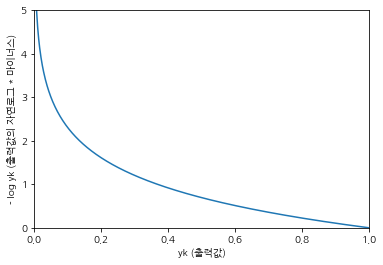

In [6]:
y = - np.log(x + 1e-7)

plt.plot(x, y)
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.xlabel("yk (출력값)")
plt.ylabel("- log yk (출력값의 자연로그 * 마이너스)")

- \[expression 4.2]은 $\log$ 값에 마이너스(-)를 곱해서 위의 그림과 같은 그래프가 됨
- 정답에 해당하는 출력($y_k$)이 커질수록 0에 가까워지다가, 그 출력이 1일 때 0 이 됨 (손실함수 E 가 최소가 됨)

In [7]:
# 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))   # np.log 계산 결과가 마이너스 무한대(-inf) 값이 되는 것을 막기 위해 아주 작은 값(0.0000001)

In [8]:
# 임의의 데이터 예 (정답은 2, 추정은 인덱스 2를 가장 큰 값인 0.6으로 추정)
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(cross_entropy_error(y, t))

# 임의의 데이터 예 (정답은 2, 추정은 인덱스 7를 가장 큰 값인 0.6으로 추정)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(cross_entropy_error(y, t))

0.510825457099338
2.302584092994546


- 위에서, 첫번째 예의 교차 엔트로피 오차가 두번째 예의 교차 엔트로피 오차 보다 작아서 추정결과가 더 정답에 가까운 것으로 판단할 수 있음

---
- **전체 훈련 데이터 셋에 대한 손실 함수(교차 엔트로피 오차)의 합** \[expression 4.3]
> $$E = - \frac{1}{N} \sum\limits_{n=0}^{N} ( \sum\limits_{k=0}^{m} t_{nk} \log y_{nk} )$$
> - $N$은 입력 데이터 수, $n$은 입력 데이터 중 n번째 데이터, $k$는 n번째 데이터에 대한 정답 레이블(또는 추정 값)의 k 번째 차원
> - $y_{nk}$는 신경망의 출력(n번째 데이터에 대한 k번째 차원의 값), $t_{nk}$는 정답 레이블(n번째 데이터에 대한 k번째 차원의 값)
> - $m$은 데이터 셋 하나의 차원 수(one-hot encoding 값의 인덱스 수), $log$는 밑이 $e$인 자연로그($\log_e$)
> - **데이터 셋 별로 손실 함수를 계산 후, 전체 데이터의 손실함수를 합한 후 $N$으로 나눔으로써 전체 데이터 셋에 대한 "평균 손실 함수"를 구함**

- **미니 배치(mini-batch) 학습** : 데이터 셋이 많은 경우, 훈련 데이터 중 일부 만을 이용하여 전체의 '근사치'를 학습하는 방법

In [11]:
# MNIST dataset 읽어오기
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)    # 정답 레이블을 one-hot encoding 형태로 읽어옴(정답 레이블 만 1, 나머지는 0)

print(X_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
# 10개의 미니 배치 선택하기
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [24]:
# 배치용 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):     # y는 신경망의 출력(Softmax 출력, 즉 클래스 별 확율), t는 정답 레이블(one-hot encoding) : y와 t는 shape가 동일함
    delta = 1e-7
    if y.ndim == 1:                         # y와 t가 1차원 배열(1개의 데이터)인 경우, matrix 형태([행, 열])로 변경하여 2차원 배열(배치 데이터)와 shape을 통일시켜줌
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]          # 데이터의 수
    return -np.sum(t * np.log(y + delta)) / batch_size

In [25]:
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

print(cross_entropy_error(y, t))

0.510825457099338


In [26]:
# 배치용 교차 엔트로피 오차 구현 (정답 레이블이 원-핫 인코딩이 아닌 경우)
def cross_entropy_error(y, t):     # y는 신경망의 출력(Softmax 출력, 즉 클래스 별 확율), t는 정답 레이블(숫자 값)
    delta = 1e-7
    if y.ndim == 1:                         # y와 t가 1차원 배열(1개의 데이터)인 경우, matrix 형태([행, 열])로 변경하여 2차원 배열(배치 데이터)와 shape을 통일시켜줌
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]          # 데이터의 수
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta)) / batch_size

- \[expression 4.2]의 설명처럼, 교차 엔트로피 오차는 **정답일 때의 추정 값($t_k$가 1인 차원의 $y_k$)에 대한 자연로그를 계산** 하는 것이기 때문에 <br>
   $y$에서 정답 레이블의 차원 값만 선택하면 원하는 결과가 됨 ($t_{nk}$를 곱하는 것이 아니라, $y$에서 $t_{nk}$ 위치 값을 선택하면 됨)
- np.arange(batch_size)는 0부터 batch_size -1 까지 배열을 생성 : batch_size가 5이면 [0, 1, 2, 3, 4] 라는 numpy 배열을 생성
- t에는 정답 레이블이 [2, 7, 0, 9, 4] 처럼 저장되어 있으므로, y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출함. <br>
   예로, [y[0,2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]] 인 numpy 배열을 생성 --> [0번째 데이터의 2번째 차원의 값, 1번째 데이터의 7번째 차원의 값, ... ]

In [28]:
t = np.array([2, 7])
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

print(cross_entropy_error(y, t))

0.510825457099338


- 궁극적인 목적은 높은 "정확도"를 끌어내는 매개변수 값을 찾는 것이지만, 정확도를 지표로 삼지 않고 손실함수를 지표로 사용함
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실함수의 값을 가능한 한 작게 하는 매개변수 값을 찾음. <br>
   가중치 매개변수의 손실함수를 미분(기울기를 계산) 하고, 그 미분 값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복함
    - 가중치 매개변수의 손실함수 미분은 "가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실함수의 기울기를 계산" 하는 것
- 정확도를 지표로 삼아서는 안되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문. <br>
   정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화함
- 정확도는 테스트 데이터에 대해 추론(predict) 한 결과가 어느 정도 정확한지를 나타내는 지표로 사용함 (학습단계 지표로는 사용하지 않음)

---
- **미분은 한 순간의 변화량을 표시한 것** &nbsp;&nbsp;&nbsp;&nbsp; \[expression 4.4]
> $$\frac{df(x)}{dx} = \underset{h \to 0}\lim \frac{f(x+h) - f(x)}{h}$$
> <br>
> - 좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호. x의 작은 변화가 f(x)를 얼마나 변화 시키느냐를 의미

In [30]:
# 수치 미분(numerical differentiation)의 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

- "10e-50"는 반올림 오차 문제를 일으킴. 반올림 오차는 작은 값(가령 소수점 8자리 이하 값)이 생략되어 최종 계산 결과에 오차가 생기게 함. <br>
   너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 됨. **미세한 값 h로 $10^{-4}$ 정도의 값을 사용**하면 좋은 결과를 얻는다고 알려져 있음
- 진정한 미분은 x 위치의 함수의 기울기(접선)에 해당하지만, 위의 구현에서 미분은 (x+h)와 x 사이의 기울기에 해당함. <br>
   진정한 미분과 위의 구현 값은 엄밀히 일치하지 않음. 이 오차를 줄이기 위해 **(x+h)와 (x-h) 일 때의 함수 f의 차분을 계산**하는 방법을 사용함. <br>
   x를 중심으로 전후의 차분을 계산한다는 의미에서 **중심 차분** 또는 **중앙 차분** 이라 함

In [32]:
# 중심 차분을 이용한 수치 미분 구현
def numerical_diff(f, x):
    h = 1e-4      # 0.0001
    return (f(x+h) - f(x-h)) / (2 * h)

- 아주 작은 차분으로 미분을 구하는 것을 "**수치 미분**"이라 함
- 수식을 전개해 미분을 구하는 것은 "**해석적(analytic)**" 이라는 말을 이용하여 "**해석적 해**" 또는 "**해석적으로 미분을 구하다**" 등으로 표현 <br>
   가령 $y = x^2$ 의 미분은 $\frac{dy}{dx} = 2x$로 풀어낼 수 있음
- 해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해줌

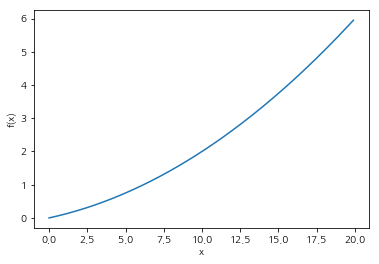

In [36]:
# 수치 미분 예
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [37]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


0.1999999999990898
0.2


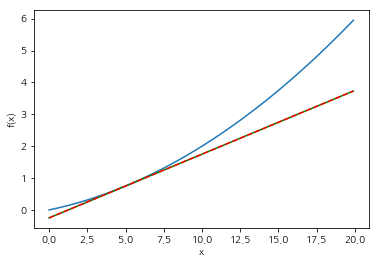

In [50]:
def tangent_line(f, x):     # 수치 미분 접선
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

def analytic_line(f, x):     # 해석적 해의 접선
    d = 0.02 * x + 0.1
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

tf = analytic_line(function_1, 5)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2, c='g')
plt.plot(x, y3, "--", c='r')


- 해석적 해법과 수치 미분의 결과는 그 오차가 매우 작음. 실제로 거의 같은 값이라고 해도 될 만큼 작은 오차임
- 위의 그래프에서 x가 5일 때 해석적 해법과 수치 미분의 접선(빨간색 점선과 녹색 직선)이 거의 일치하여 겹쳐져 있음

---
- **편미분** (변수가 여럿인 함수에 대한 미분) : 변수가 2개인 함수 예
> $f(x_0, x_1) = x_0^2 + x_1^2$
> - 편미분을 수식으로 $\frac{\delta f}{\delta x_0}$, $\frac{\delta f}{\delta x_1}$ 처럼 씀
> - 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정함

In [114]:
def function_2(x0, x1):
    return x0 ** 2 + x1 ** 2

Text(0.5, 0, 'z')

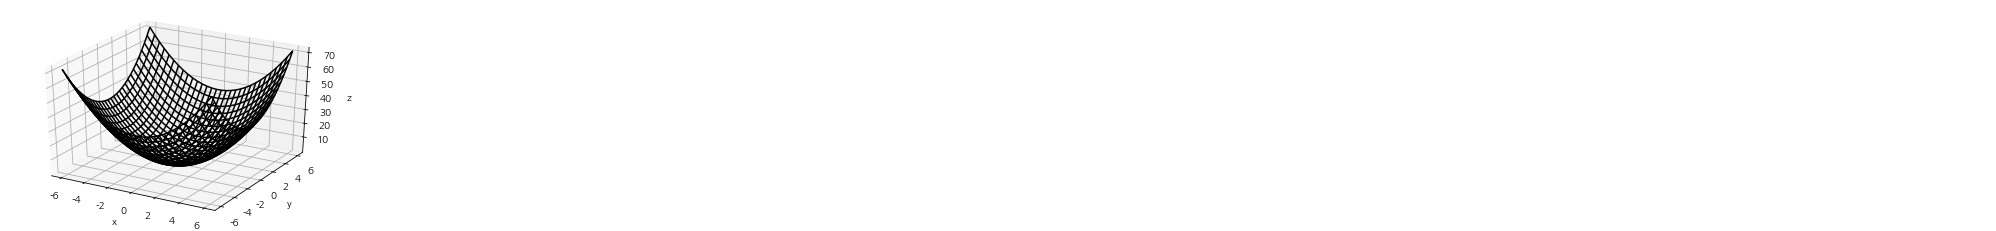

In [115]:
from mpl_toolkits.mplot3d import axes3d

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = function_2(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [126]:
# x0에 대한 편미분 (x0=3, x1=4 일때)
def function_tmp0(x0):
    return x0 ** 2 + 4  ** 2       # x0는 변수, x1은 상수(고정된 값)로 재정의 된 함수

numerical_diff(function_tmp0, 3)

6.00000000000378

In [127]:
# x1에 대한 편미분 (x0=3, x1=4 일때)
def function_tmp1(x1):
    return 3 ** 2 + x1  ** 2       # x0는 상수(고정된 값), x1은 변수로 재정의 된 함수

numerical_diff(function_tmp1, 4)

7.999999999999119

- **기울기**

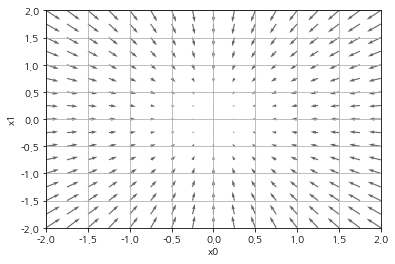

In [137]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]))
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()